In [28]:
from open_files import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
# Read the datasets into a "data_dict", "tracksMeta_dict" and "recordMeta_dict" dictionary. 
#"file_numbers" tells you what files are available.
file_numbers, data_dict, trackMeta_dict, recordMeta_dict = read_files()
if len(file_numbers)==1:
    num = file_numbers[0]
else:
    num = input(f"Which file number do you want to calculate the parameters for? {file_numbers}")

In [30]:
data_dict[f"data_{num}"]

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.00,...,0.00,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.00,...,0.00,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.00,...,0.00,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348745,22535,1047,366.97,12.54,6.37,3.13,-35.63,0.19,-0.74,0.11,...,-34.18,1045,0,0,0,0,1039,0,0,3
348746,22536,1047,365.55,12.55,6.37,3.13,-35.66,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348747,22537,1047,364.12,12.56,6.37,3.13,-35.69,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348748,22538,1047,362.69,12.57,6.37,3.13,-35.72,0.21,-0.74,0.11,...,-34.20,1045,0,0,0,0,1039,0,0,3


In [31]:
trackMeta_dict[f"data_{num}"]

,id,width,height,initialFrame,finalFrame,numFrames,class,drivingDirection,traveledDistance,minXVelocity,maxXVelocity,meanXVelocity,minDHW,minTHW,minTTC,numLaneChanges
0,1,4.85,2.12,1,33,33,Car,2,52.25,40.85,41.30,41.07,-1.00,-1.00,-1.00,0
1,2,4.24,1.92,1,130,130,Car,1,167.44,32.04,32.90,32.48,112.62,3.51,-1.00,0
2,3,3.94,1.92,1,157,157,Car,2,225.23,35.69,36.50,36.13,90.31,2.53,-1.00,0
3,4,5.05,2.22,1,161,161,Car,1,273.49,42.57,42.83,42.76,-1.00,-1.00,-1.00,0
4,5,4.24,1.82,1,182,182,Car,1,313.92,42.50,44.26,43.40,33.64,0.76,24.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1043,7.38,2.53,22376,22539,164,Car,1,209.80,31.28,33.26,32.21,16.46,0.52,-1.00,0
1043,1044,5.15,2.02,22383,22538,156,Car,2,233.81,37.03,39.03,37.75,63.66,1.68,45.59,0
1044,1045,4.75,2.02,22456,22539,84,Car,1,112.72,33.95,34.21,34.01,91.27,2.67,52.71,0
1045,1046,4.35,2.12,22456,22531,76,Car,1,89.72,29.44,30.58,29.96,118.38,4.02,19.11,0


In [32]:
recordMeta_dict[f"data_{num}"]

,id,frameRate,locationId,speedLimit,month,weekDay,startTime,duration,totalDrivenDistance,totalDrivenTime,numVehicles,numCars,numTrucks,upperLaneMarkings,lowerLaneMarkings
0,1,25,2,-1.0,9.2017,Tue,08:38,901.56,418549.19,13908.12,1047,863,184,8.51;12.59;16.43,21.00;24.96;28.80


# TTC

In [6]:
ttc_mean = np.mean(data_dict[f"data_{num}"]["ttc"])
ttc_std = np.std(data_dict[f"data_{num}"]["ttc"])

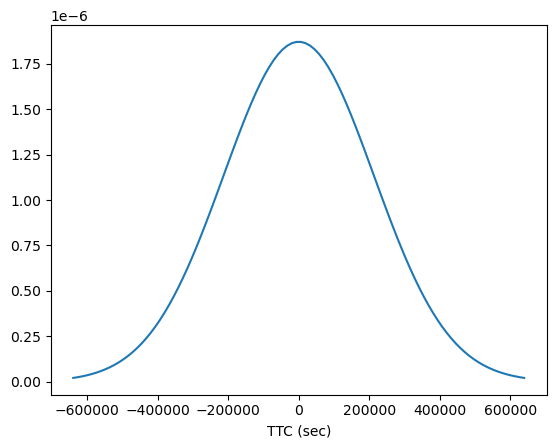

In [7]:
x = np.linspace(ttc_mean - 3*ttc_std, ttc_mean + 3*ttc_std, 100)
plt.plot(x, stats.norm.pdf(x, ttc_mean, ttc_std))
plt.xlabel("TTC (sec)")
plt.show()

# Speed

In [8]:
xVelocity = data_dict[f"data_{num}"]["xVelocity"]*3600/1000
yVelocity = data_dict[f"data_{num}"]["yVelocity"]*3600/1000
velocity = np.sqrt(xVelocity**2+yVelocity**2)

velocity_mean = np.mean(velocity)
velocity_std = np.std(velocity)

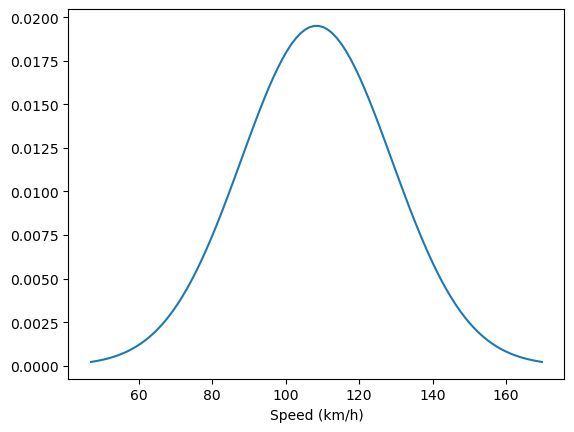

In [9]:
x2 = np.linspace(velocity_mean - 3*velocity_std, velocity_mean + 3*velocity_std, 100)
plt.plot(x2, stats.norm.pdf(x2, velocity_mean, velocity_std))
plt.xlabel("Speed (km/h)")
plt.show()

# DRAC

In [10]:
data_dict[f"data_{num}"]["DRAC"] = (data_dict[f"data_{num}"]["precedingXVelocity"] - data_dict[f"data_{num}"]["xVelocity"])**2/(data_dict[f"data_{num}"]["dhw"])
data_dict[f"data_{num}"]["DRAC"].replace([np.inf, -np.inf], np.nan, inplace=True)
DRAC = data_dict[f"data_{num}"]["DRAC"]

DRAC_mean = np.mean(DRAC)
DRAC_std = np.std(DRAC)

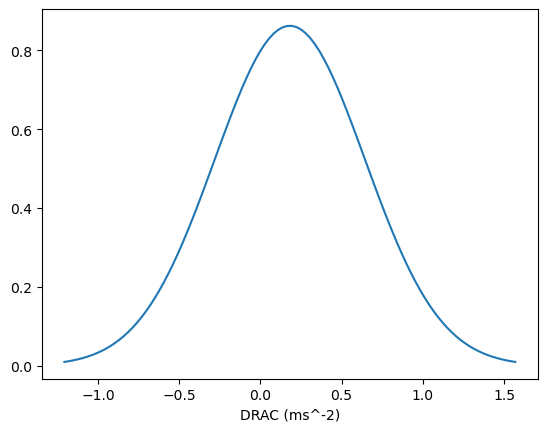

In [11]:
x3 = np.linspace(DRAC_mean - 3*DRAC_std, DRAC_mean + 3*DRAC_std, 100)
plt.plot(x3, stats.norm.pdf(x3, DRAC_mean, DRAC_std))
plt.xlabel("DRAC (ms^-2)")
plt.show()

# Density

In [43]:
frameRate = 25
frameTime = 1/frameRate

# modifiable parameters:
# size_of_bins          Number of frames per bin
# length_of_road        The length of the road on which the density is computed
# dataset               Which dataset is used to compute
size_of_bins = 2400
length_of_road = 410

# for i in range(n_files):
frames = trackMeta_dict[f"data_{num}"]["drivingDirection"].shape[0]
n_bins = trackMeta_dict[f"data_{num}"]["finalFrame"][frames-1]//size_of_bins+1

# initialization of bins for each direction
bins_1 = [0]*(n_bins)
bins_2 = [0]*(n_bins)

for j in range(frames):
    # we compute the floor of the initial and final frame for each vehicle
    initial = trackMeta_dict[f"data_{num}"]["initialFrame"][j]//size_of_bins
    final = trackMeta_dict[f"data_{num}"]["finalFrame"][j]//size_of_bins

    if(trackMeta_dict[f"data_{num}"]["drivingDirection"][j] == 1):
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_1[k] += 1
    else:
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_2[k] += 1

density_1 = np.array(bins_1)/length_of_road
density_2 = np.array(bins_2)/length_of_road

# we gather the relevant statistics for the density at each side of the road
density_mean_1 = np.mean(density_1)
density_std_1 = np.std(density_1)

density_mean_2 = np.mean(density_2)
density_std_2 = np.std(density_2)

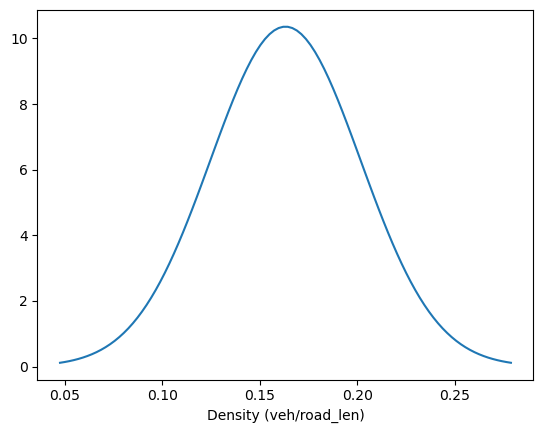

In [44]:
x4_1 = np.linspace(density_mean_1 - 3*density_std_1, density_mean_1 + 3*density_std_1, 100)
plt.plot(x4_1, stats.norm.pdf(x4_1, density_mean_1, density_std_1))
plt.xlabel("Density (veh/road_len)")
plt.show()

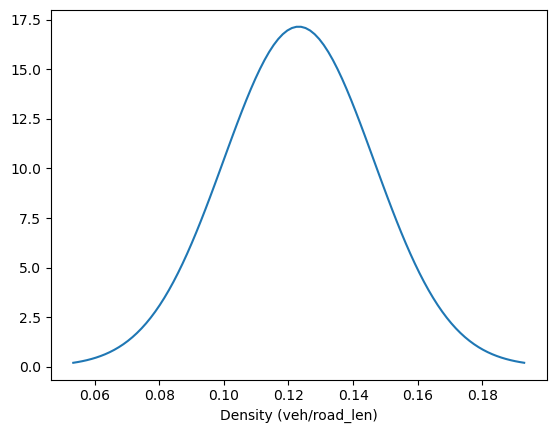

In [45]:
x4_2 = np.linspace(density_mean_2 - 3*density_std_2, density_mean_2 + 3*density_std_2, 100)
plt.plot(x4_2, stats.norm.pdf(x4_2, density_mean_2, density_std_2))
plt.xlabel("Density (veh/road_len)")
plt.show()

# Intensity

In [19]:
cs_pos = 200
frame_rate = 25
time = np.ceil(recordMeta_dict[f"data_{num}"]["duration"]).astype("int")
frame = data_dict[f"data_{num}"]["frame"]
x_pos = data_dict[f"data_{num}"]["x"]
width = data_dict[f"data_{num}"]["width"]
num_data = len(frame)
num_vehicle = np.zeros(time)

for i in range(num_data):
    if x_pos[i]>=cs_pos-(width[i]/2) and x_pos[i]<=cs_pos+(width[i]/2):
        j = frame[i] // frame_rate
        num_vehicle[j] += 1
intensity_mean = np.mean(num_vehicle)
intensity_std = np.std(num_vehicle)

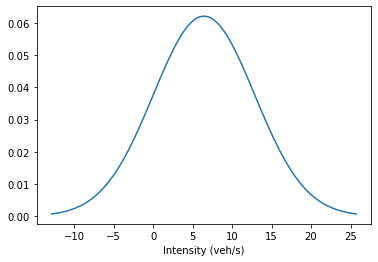

In [20]:
x5 = np.linspace(intensity_mean - 3*intensity_std, intensity_mean + 3*intensity_std, 100)
plt.plot(x5, stats.norm.pdf(x5, intensity_mean, intensity_std))
plt.xlabel("Intensity (veh/s)")
plt.show()

# Output Results

In [24]:
# Save results to dataframe
result = {"TTC":[ttc_mean, ttc_std], "Speed":[velocity_mean, velocity_std], "DRAC":[DRAC_mean, DRAC_std], "Density":[0, 0], "Intensity":[intensity_mean, intensity_std]}
result = pd.DataFrame(result)
result.index = ["Mean", "Std"]

In [25]:
result.head()

,TTC,Speed,DRAC,Density,Intensity
Mean,-362.177946,108.401954,0.181248,0,6.435698
Std,213244.298127,20.449825,0.462603,0,6.422467
